In [1]:
from tensorflow.keras.models import load_model
# Load the  model
MobileNetV2_loaded = load_model('MobileNetV2_model.h5')

import pickle
# Loading the history
with open('MobileNetV2_history.pkl', 'rb') as file:
    MobileNetV2_history = pickle.load(file)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

validation_generator = train_datagen.flow_from_directory(
    'C:\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', # use 'categorical' for multiple classes
    seed=20,
    subset='validation'
)
MobileNetV2_loss, MobileNetV2_accuracy = MobileNetV2_loaded.evaluate(validation_generator)
print("Validation Loss:", MobileNetV2_loss)
print("Validation Accuracy:", MobileNetV2_accuracy)

Found 1372 images belonging to 11 classes.

43/43 [==============================] - 50s 998ms/step - loss: 0.5872 - accuracy: 0.8542
Validation Loss: 0.5871989130973816
Validation Accuracy: 0.8542274236679077


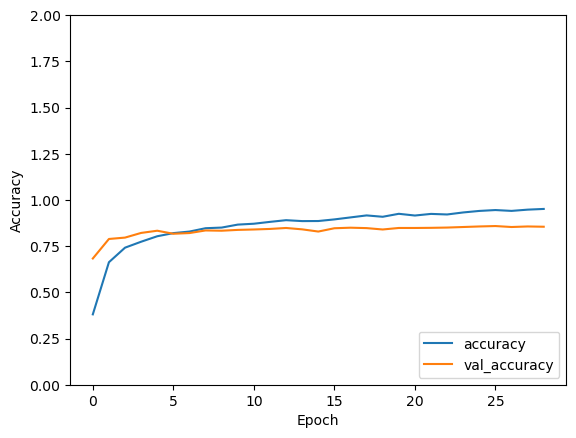

In [3]:
# Step 12: Visualize training history
import matplotlib.pyplot as plt
plt.plot(MobileNetV2_history['accuracy'] , label='accuracy')
plt.plot(MobileNetV2_history['val_accuracy'] , label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.show()